## Indução 1


Primeiras linhas da base de dados:
   ('P1_a ', 'Idade') ('P1_b ', 'Genero') ('P1_c ', 'Cor/raca/etnia')  \
0                  31           Masculino                      Branca   
1                  30           Masculino                      Branca   
2                  37            Feminino                     Amarela   
3                  34           Masculino                      Branca   
4                  30           Masculino                      Branca   

  ('P1_i ', 'Estado onde mora') ('P1_l ', 'Nivel de Ensino')  \
0             Minas Gerais (MG)             Doutorado ou Phd   
1           Espírito Santo (ES)        Graduação/Bacharelado   
2                São Paulo (SP)        Graduação/Bacharelado   
3             Minas Gerais (MG)             Doutorado ou Phd   
4           Rio de Janeiro (RJ)       Estudante de Graduação   

  ('P2_g ', 'Nivel')  Tempo de experiência na área de dados (anos)  \
0             Sênior                                             3   
1

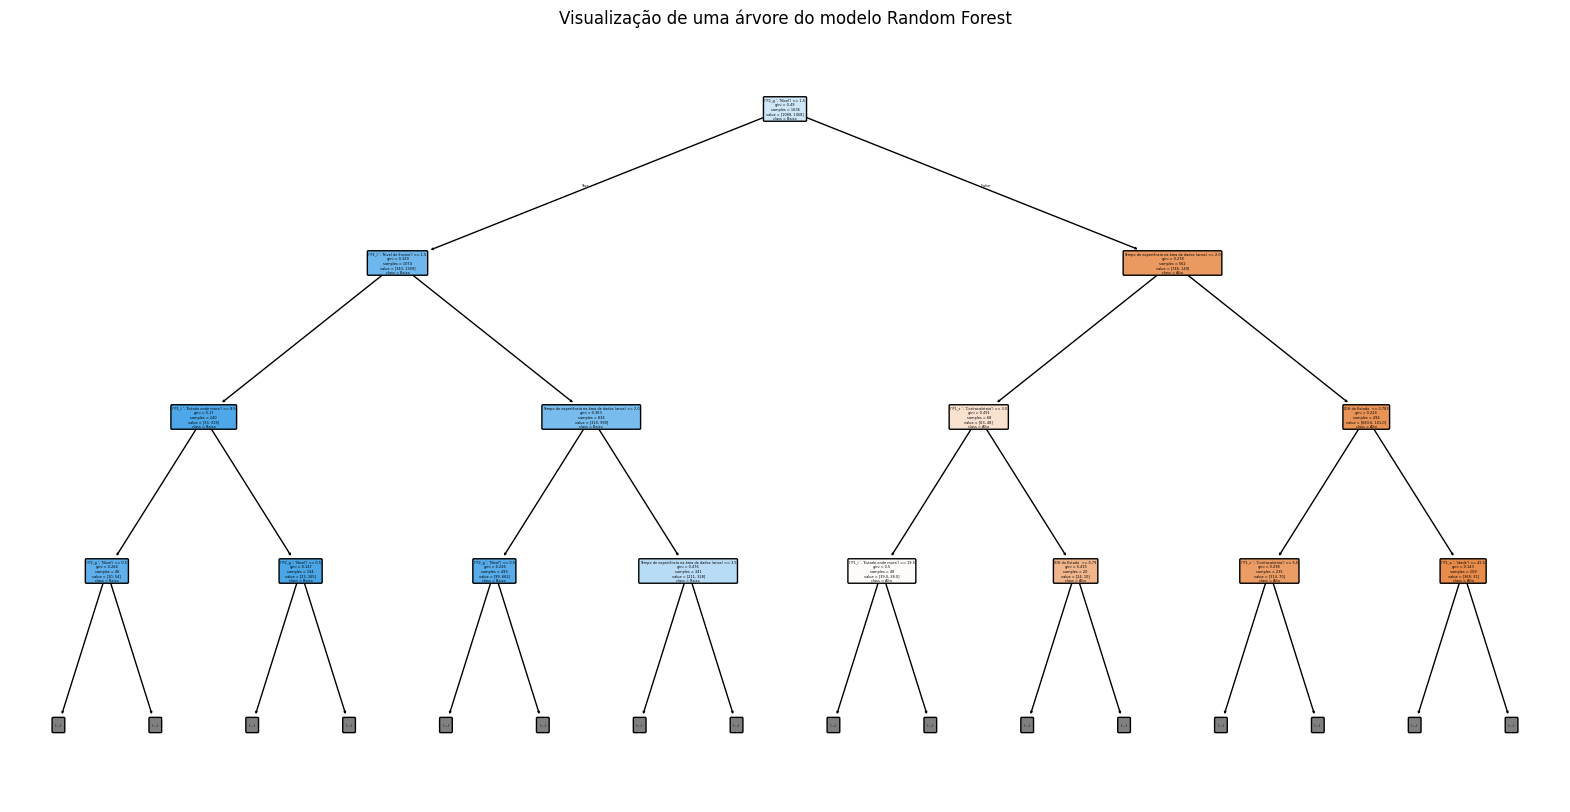

<Figure size 1200x800 with 0 Axes>

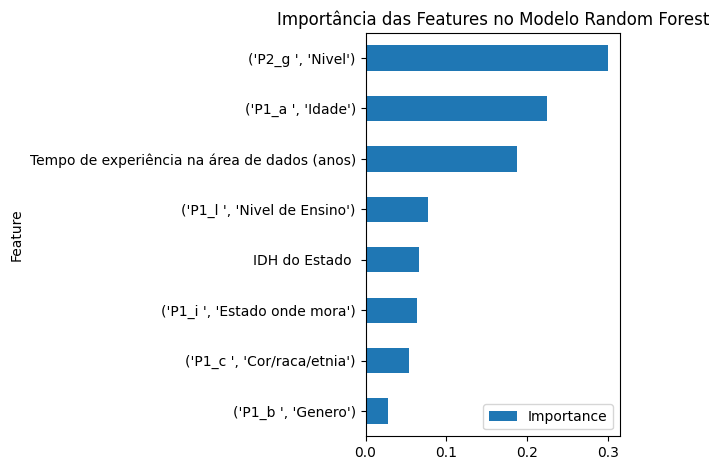

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

# Carregando a base de dados
df = pd.read_excel('Base_random_forest.xlsx')

# Visualizando as primeiras linhas da base
print("Primeiras linhas da base de dados:")
print(df.head())

# Renomeando as colunas para facilitar o manuseio
# Extraindo o segundo elemento de cada tupla para colunas com nomes compostos
colunas_renomeadas = []
for col in df.columns:
    if isinstance(col, tuple):
        colunas_renomeadas.append(col[1].strip())
    else:
        colunas_renomeadas.append(col)

df.columns = colunas_renomeadas
print("\nColunas renomeadas:")
print(df.columns)

# Verificando informações da base
print("\nInformações da base:")
print(df.info())

# Verificando estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificando valores únicos das variáveis categóricas
print("\nValores únicos das variáveis categóricas:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Tratamento dos dados
# Codificando variáveis categóricas
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Salario':  # Não codificamos a variável alvo ainda
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Separando features e target
X = df.drop('Salario', axis=1)
y = df['Salario']

# Codificando a variável alvo (Salario)
le_salario = LabelEncoder()
y = le_salario.fit_transform(y)
print("\nCodificação da variável alvo:")
for i, classe in enumerate(le_salario.classes_):
    print(f"{classe}: {i}")

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Treinando o modelo Random Forest
print("\nTreinando o modelo Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de treinamento
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nAcurácia no conjunto de treinamento: {train_accuracy:.4f}")

# Avaliando o modelo no conjunto de teste
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred, target_names=le_salario.classes_))

# Importância das features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance)

# Visualizando uma árvore do modelo (a primeira árvore da floresta)
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=le_salario.classes_,
          filled=True,
          rounded=True,
          max_depth=3)
plt.title("Visualização de uma árvore do modelo Random Forest")
plt.savefig('arvore_random_forest.png', dpi=300, bbox_inches='tight')
print("\nGráfico da árvore salvo como 'arvore_random_forest.png'")

# Visualizando a importância das features
plt.figure(figsize=(12, 8))
feature_importance.sort_values('Importance').plot(kind='barh', x='Feature', y='Importance')
plt.title('Importância das Features no Modelo Random Forest')
plt.tight_layout()
plt.savefig('importancia_features.png', dpi=300)
print("Gráfico de importância das features salvo como 'importancia_features.png'")


## Indução 2

Acurácia (Treino): 0.9705535924617197
Acurácia (Teste): 0.7802197802197802


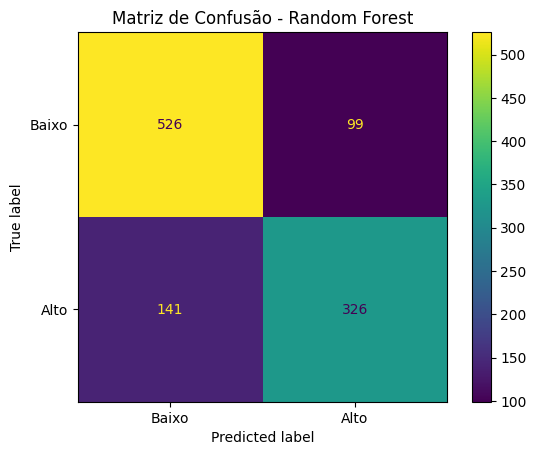

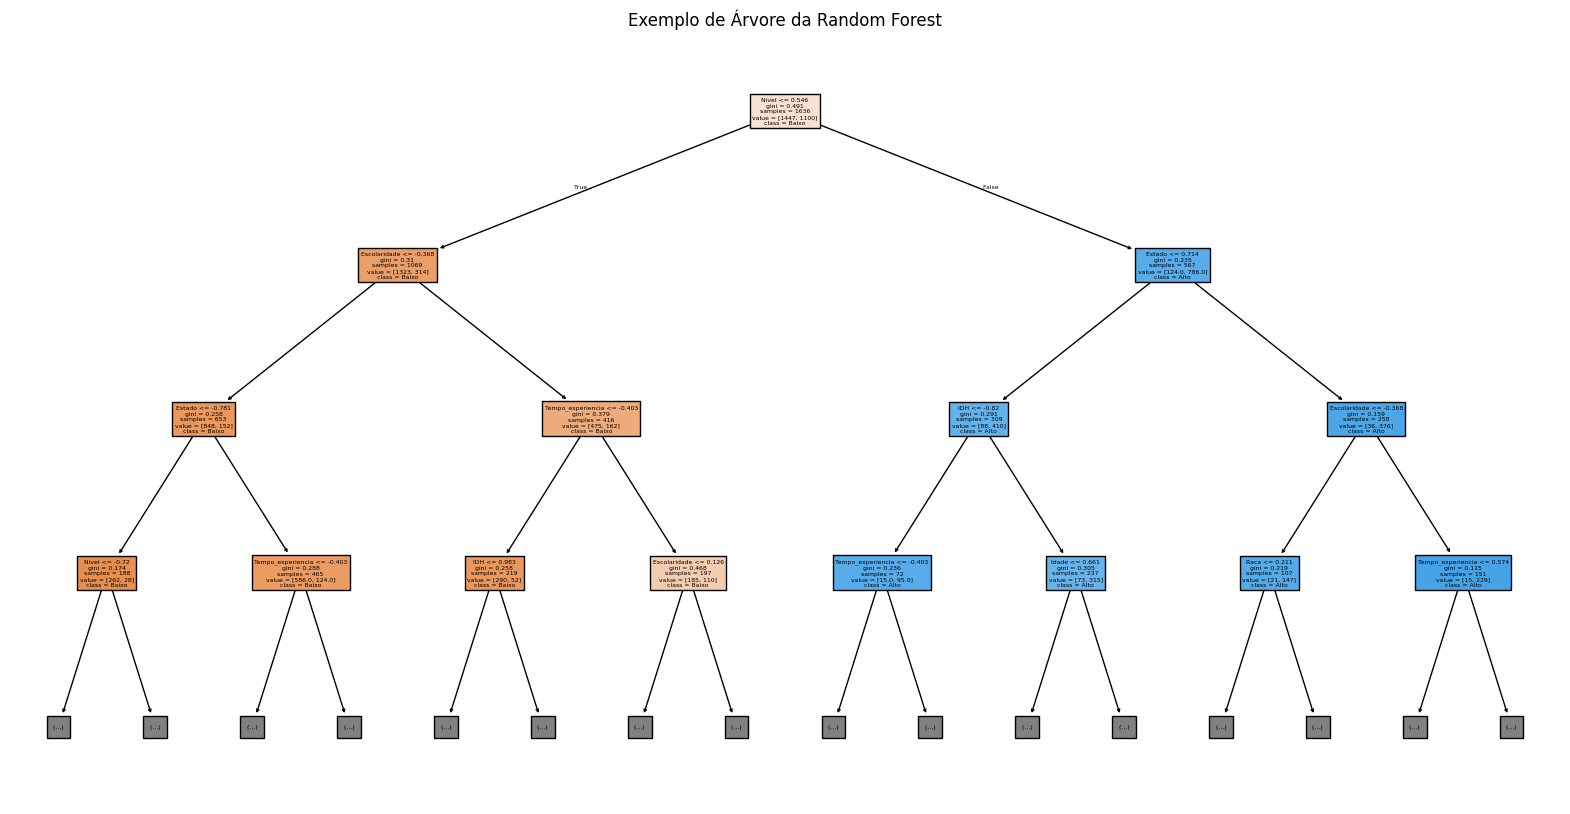

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Avaliação do modelo
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 9. Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixo", "Alto"])
disp.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# 10. Visualização de uma árvore da floresta
plt.figure(figsize=(20, 10))
tree.plot_tree(model.estimators_[0],
               feature_names=X.columns,
               class_names=["Baixo", "Alto"],
               filled=True,
               max_depth=3)
plt.title("Exemplo de Árvore da Random Forest")
plt.show()

## Adicionar medidas de avaliação

Acurácia (Treino): 0.9705535924617197
Acurácia (Teste): 0.7802197802197802

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.79      0.84      0.81       625
        Alto       0.77      0.70      0.73       467

    accuracy                           0.78      1092
   macro avg       0.78      0.77      0.77      1092
weighted avg       0.78      0.78      0.78      1092



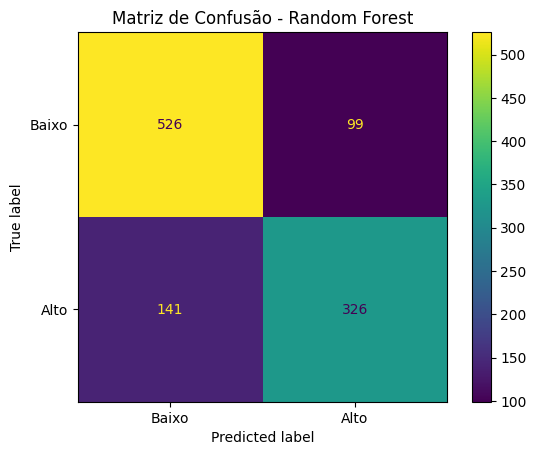

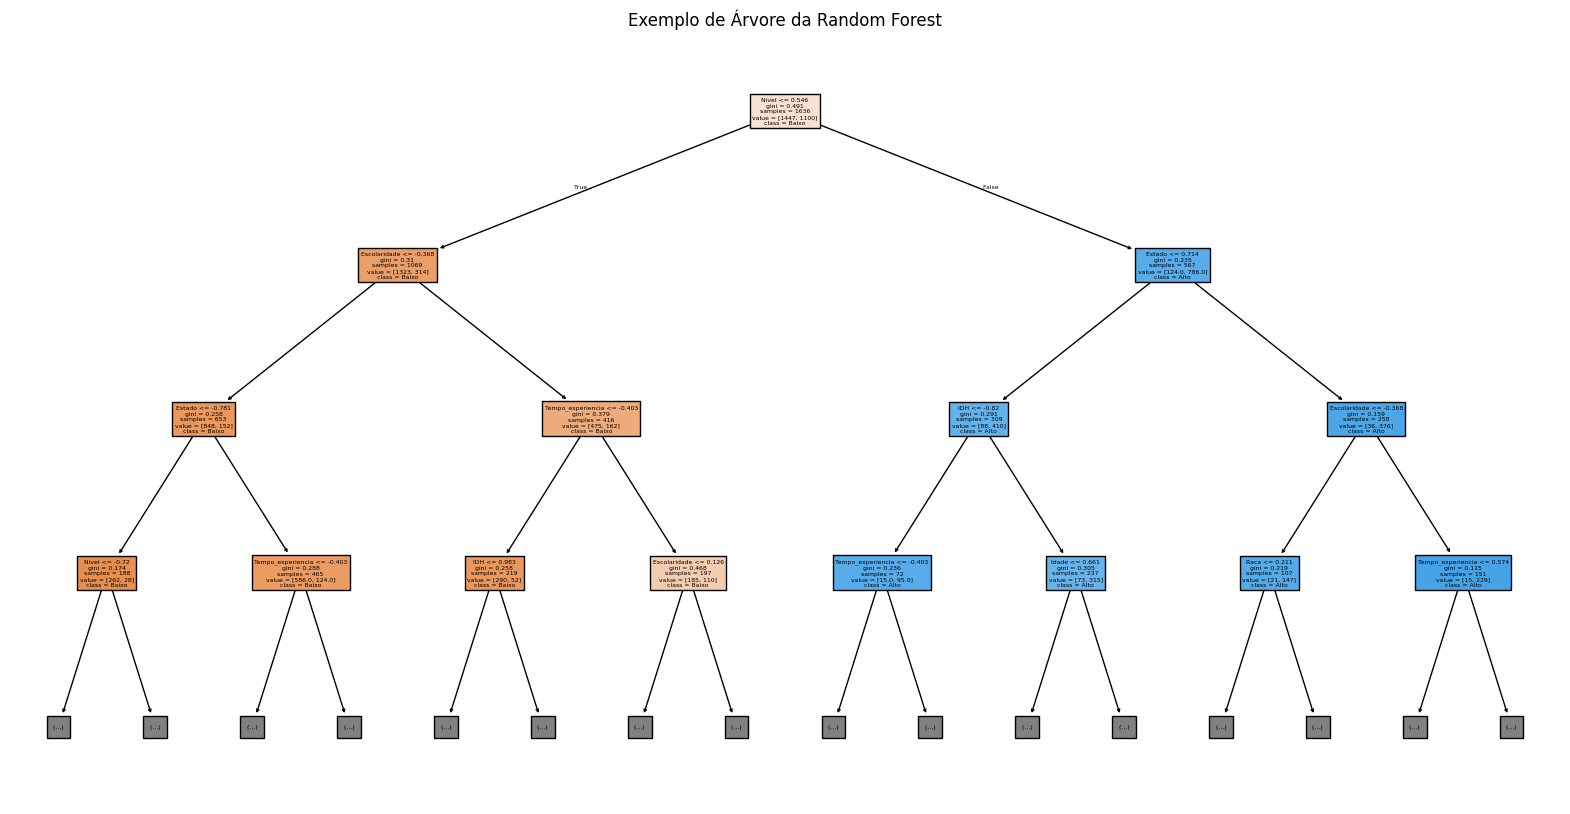

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixo", "Alto"])
disp.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# 12. Visualização de uma árvore da floresta
plt.figure(figsize=(20, 10))
tree.plot_tree(model.estimators_[0],
               feature_names=X.columns,
               class_names=["Baixo", "Alto"],
               filled=True,
               max_depth=3)
plt.title("Exemplo de Árvore da Random Forest")
plt.show()

## Alterar matriz de confusão e árvore

Acurácia (Treino): 0.9705535924617197
Acurácia (Teste): 0.7802197802197802

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.79      0.84      0.81       625
        Alto       0.77      0.70      0.73       467

    accuracy                           0.78      1092
   macro avg       0.78      0.77      0.77      1092
weighted avg       0.78      0.78      0.78      1092



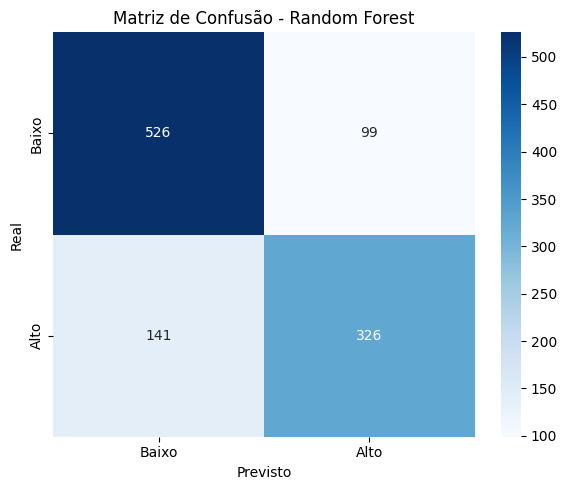

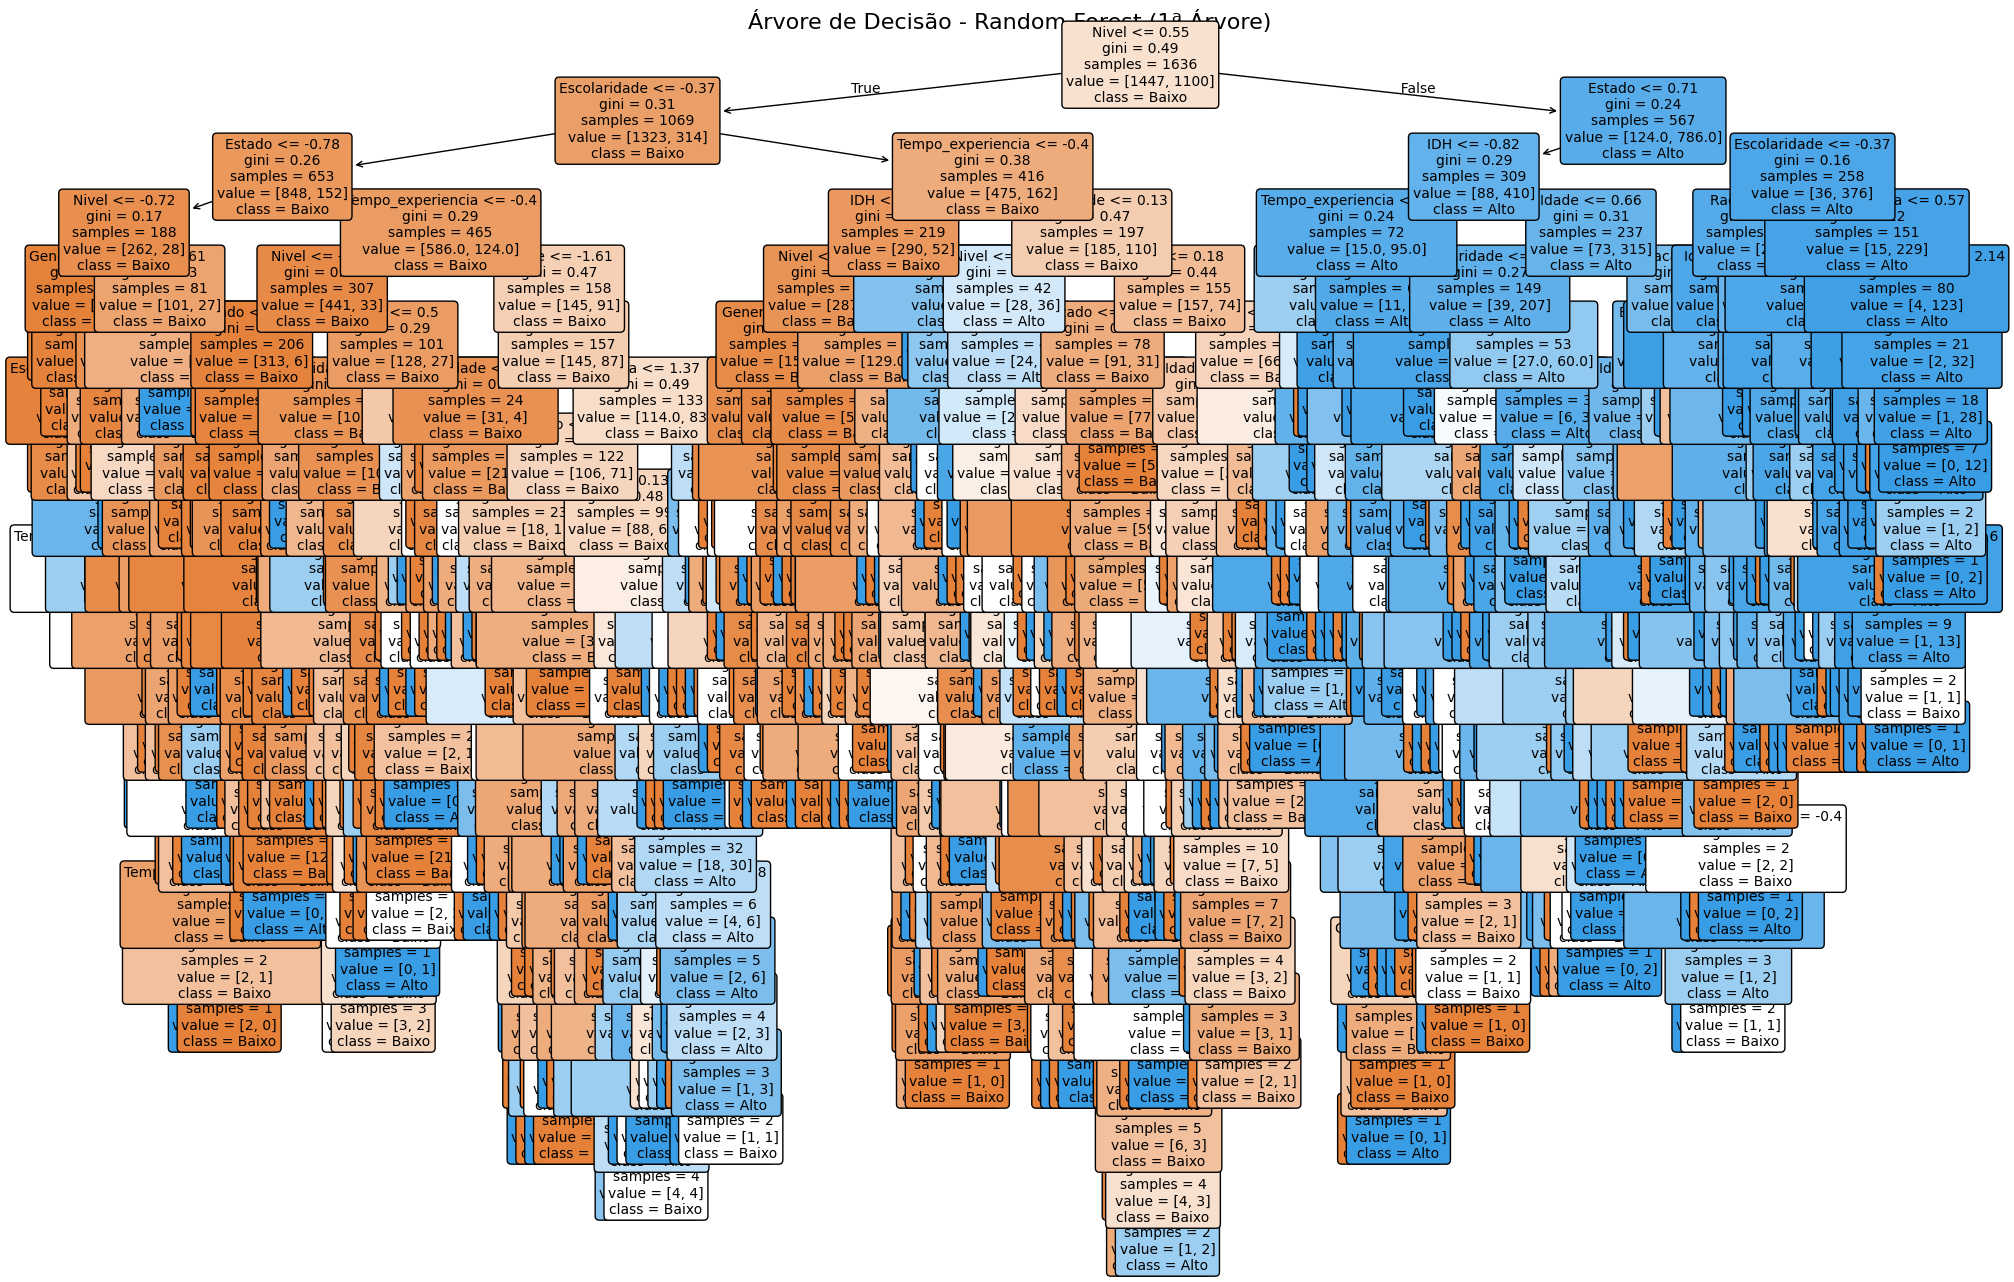

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 12. Visualização de uma das árvores da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()

## Ajustes

Acurácia (Treino): 0.9697698385434559
Acurácia (Teste): 0.7788461538461539

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.79      0.84      0.81       417
        Alto       0.76      0.70      0.73       311

    accuracy                           0.78       728
   macro avg       0.78      0.77      0.77       728
weighted avg       0.78      0.78      0.78       728



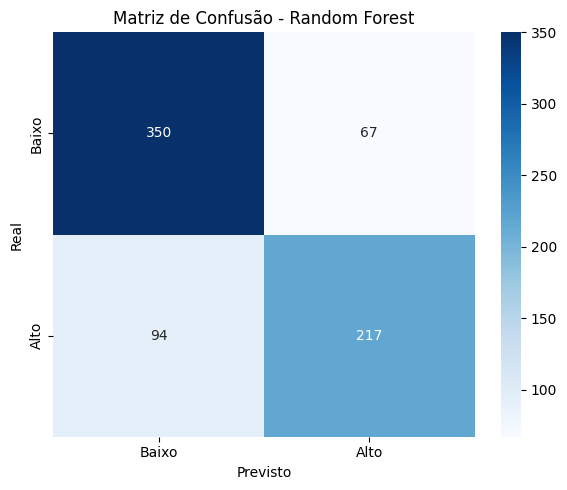

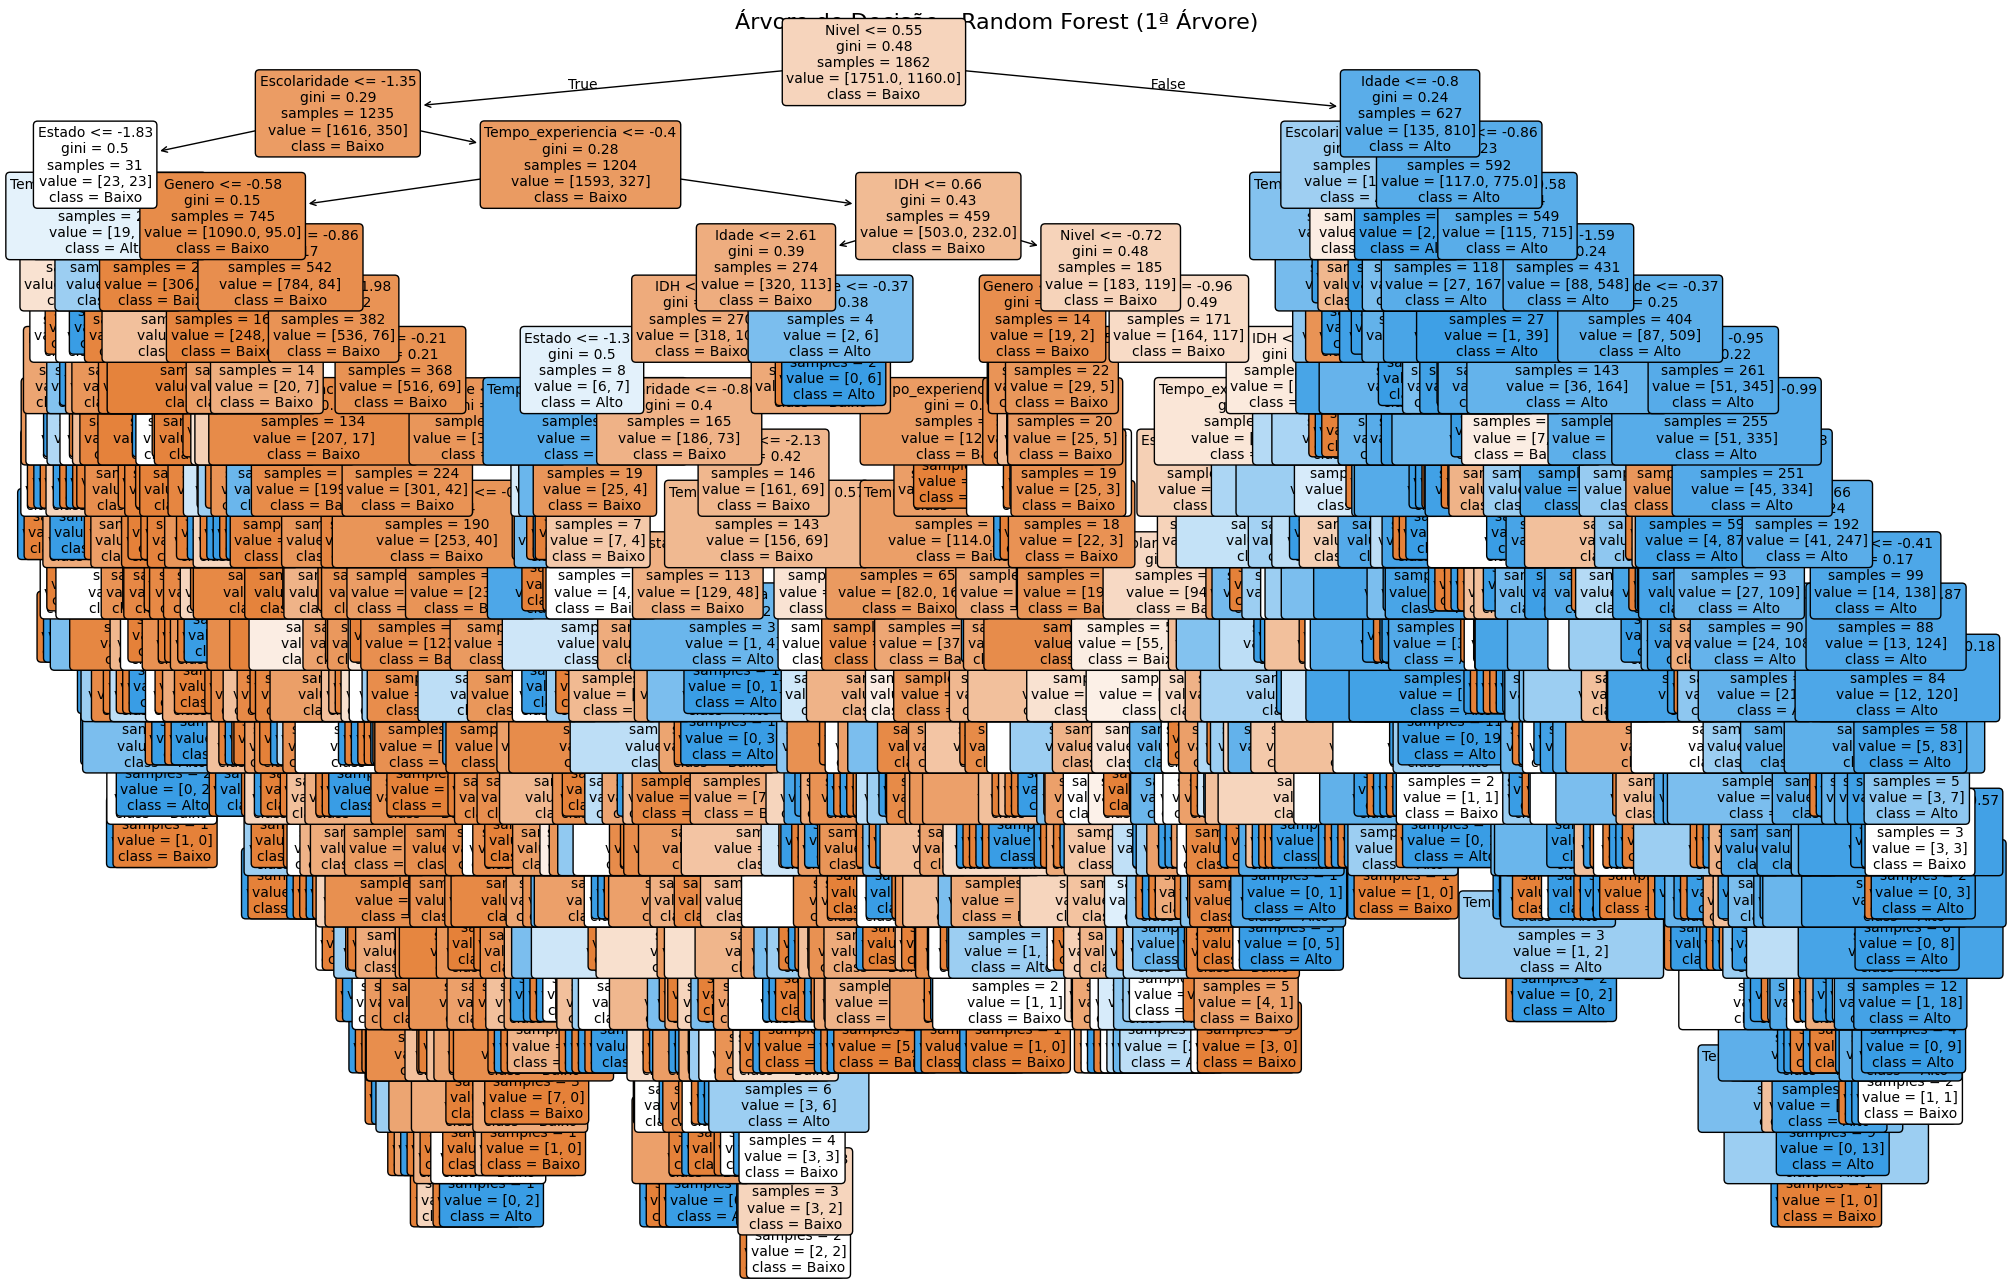

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 12. Visualização de uma das árvores da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()

Acurácia (Treino): 0.9679389312977099
Acurácia (Teste): 0.7857142857142857

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.79      0.86      0.82       208
        Alto       0.78      0.69      0.73       156

    accuracy                           0.79       364
   macro avg       0.79      0.77      0.78       364
weighted avg       0.79      0.79      0.78       364



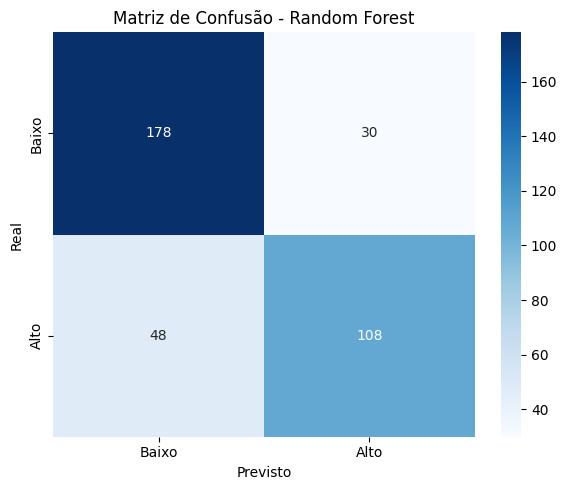

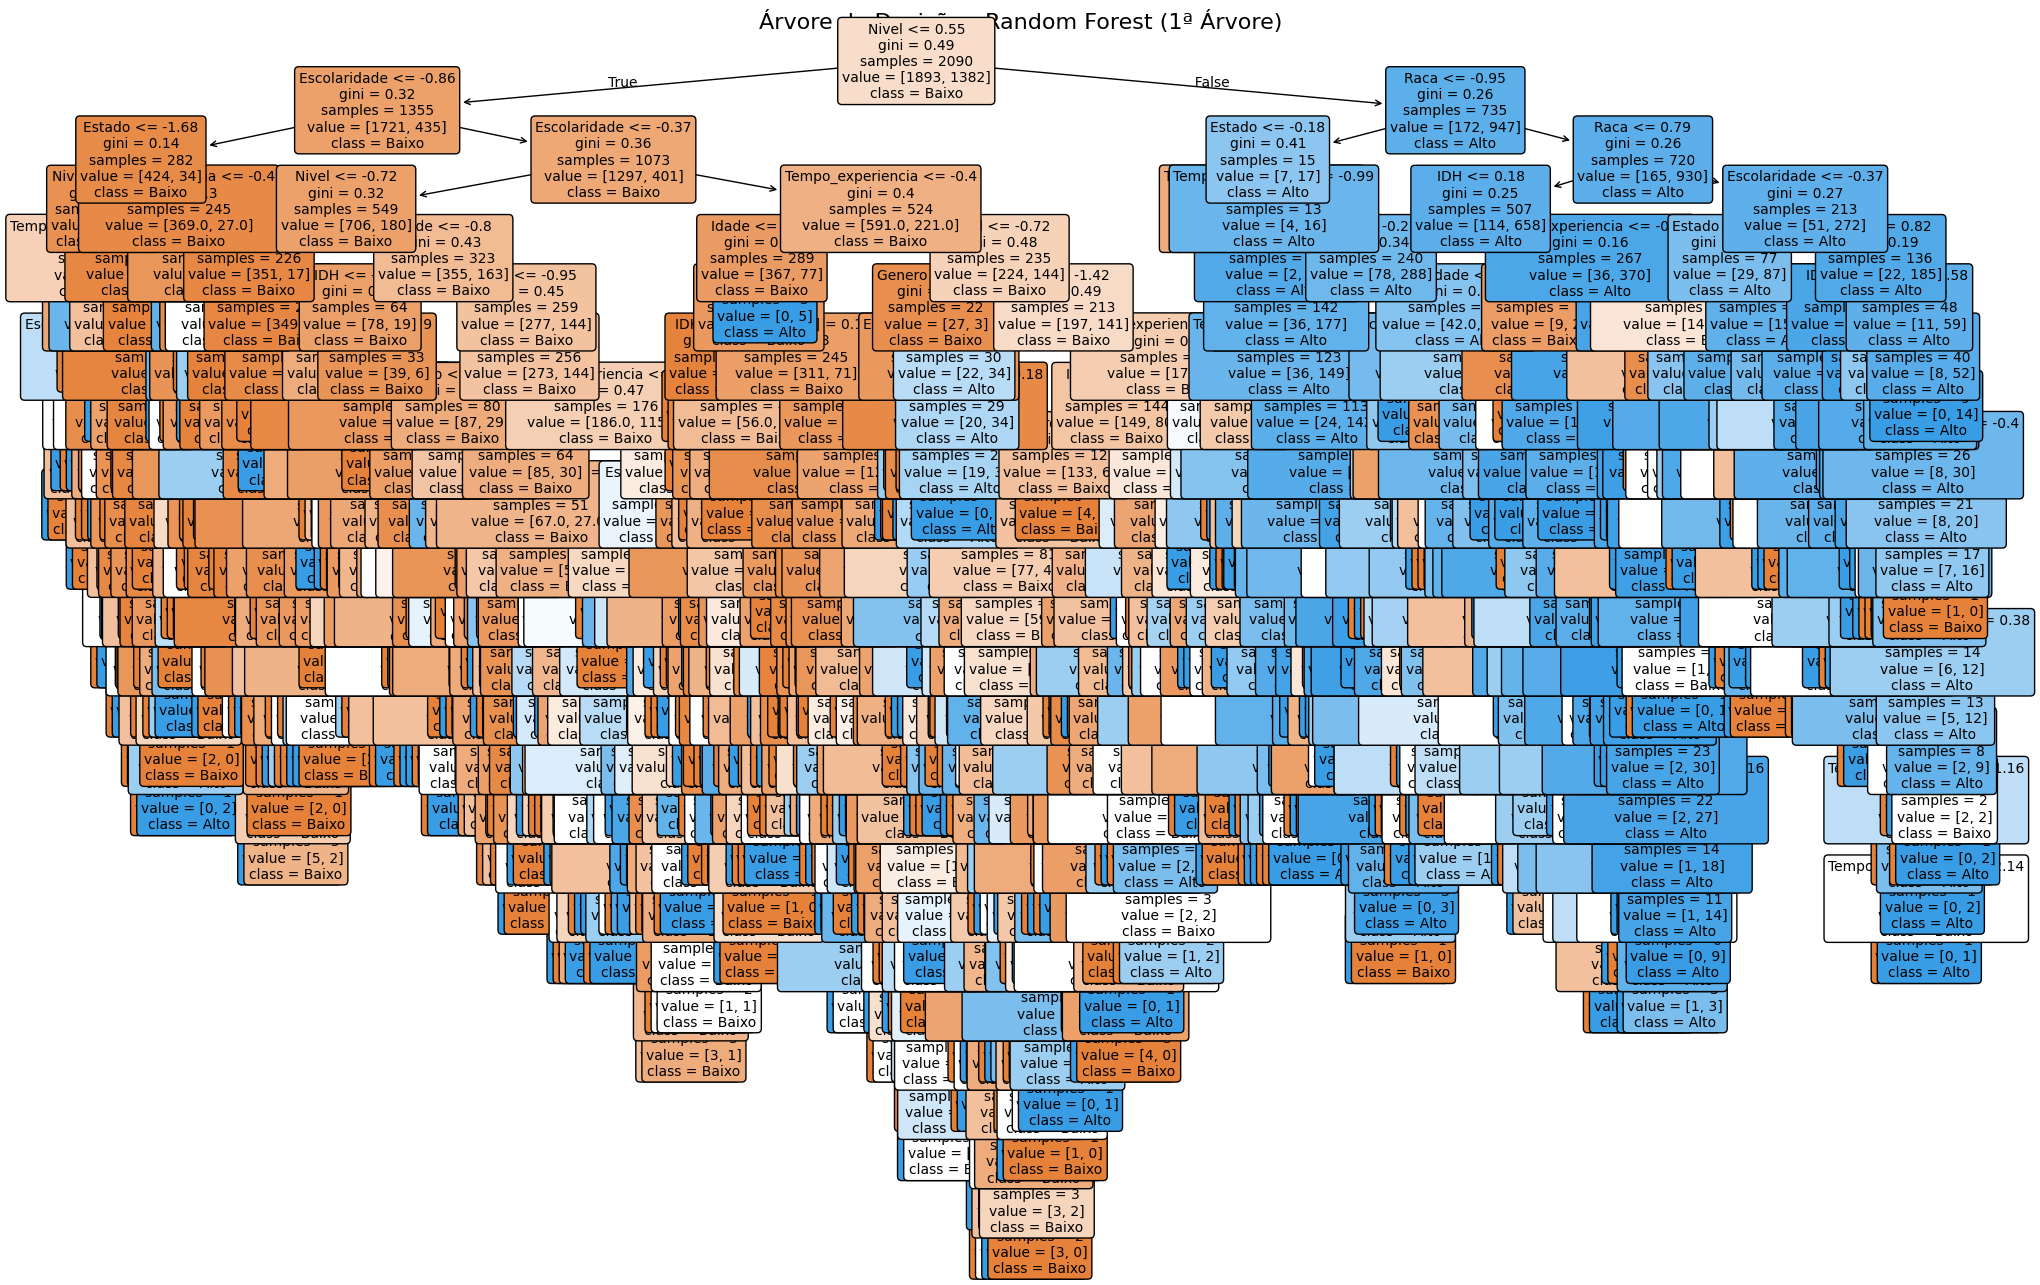

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 12. Visualização de uma das árvores da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()

Acurácia (Treino): 0.9566412213740458
Acurácia (Teste): 0.7664835164835165

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.77      0.84      0.80       208
        Alto       0.76      0.67      0.71       156

    accuracy                           0.77       364
   macro avg       0.76      0.75      0.76       364
weighted avg       0.77      0.77      0.76       364



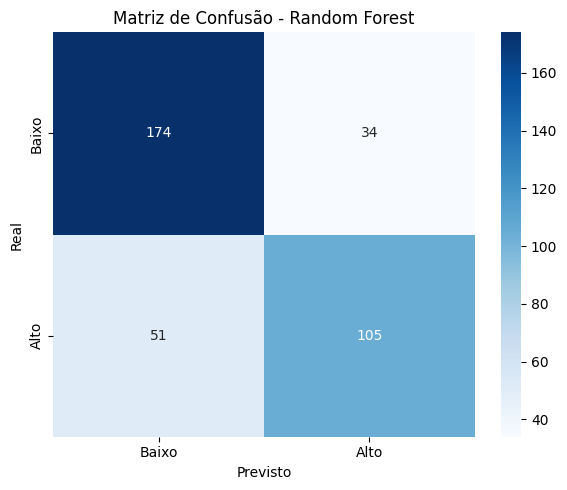

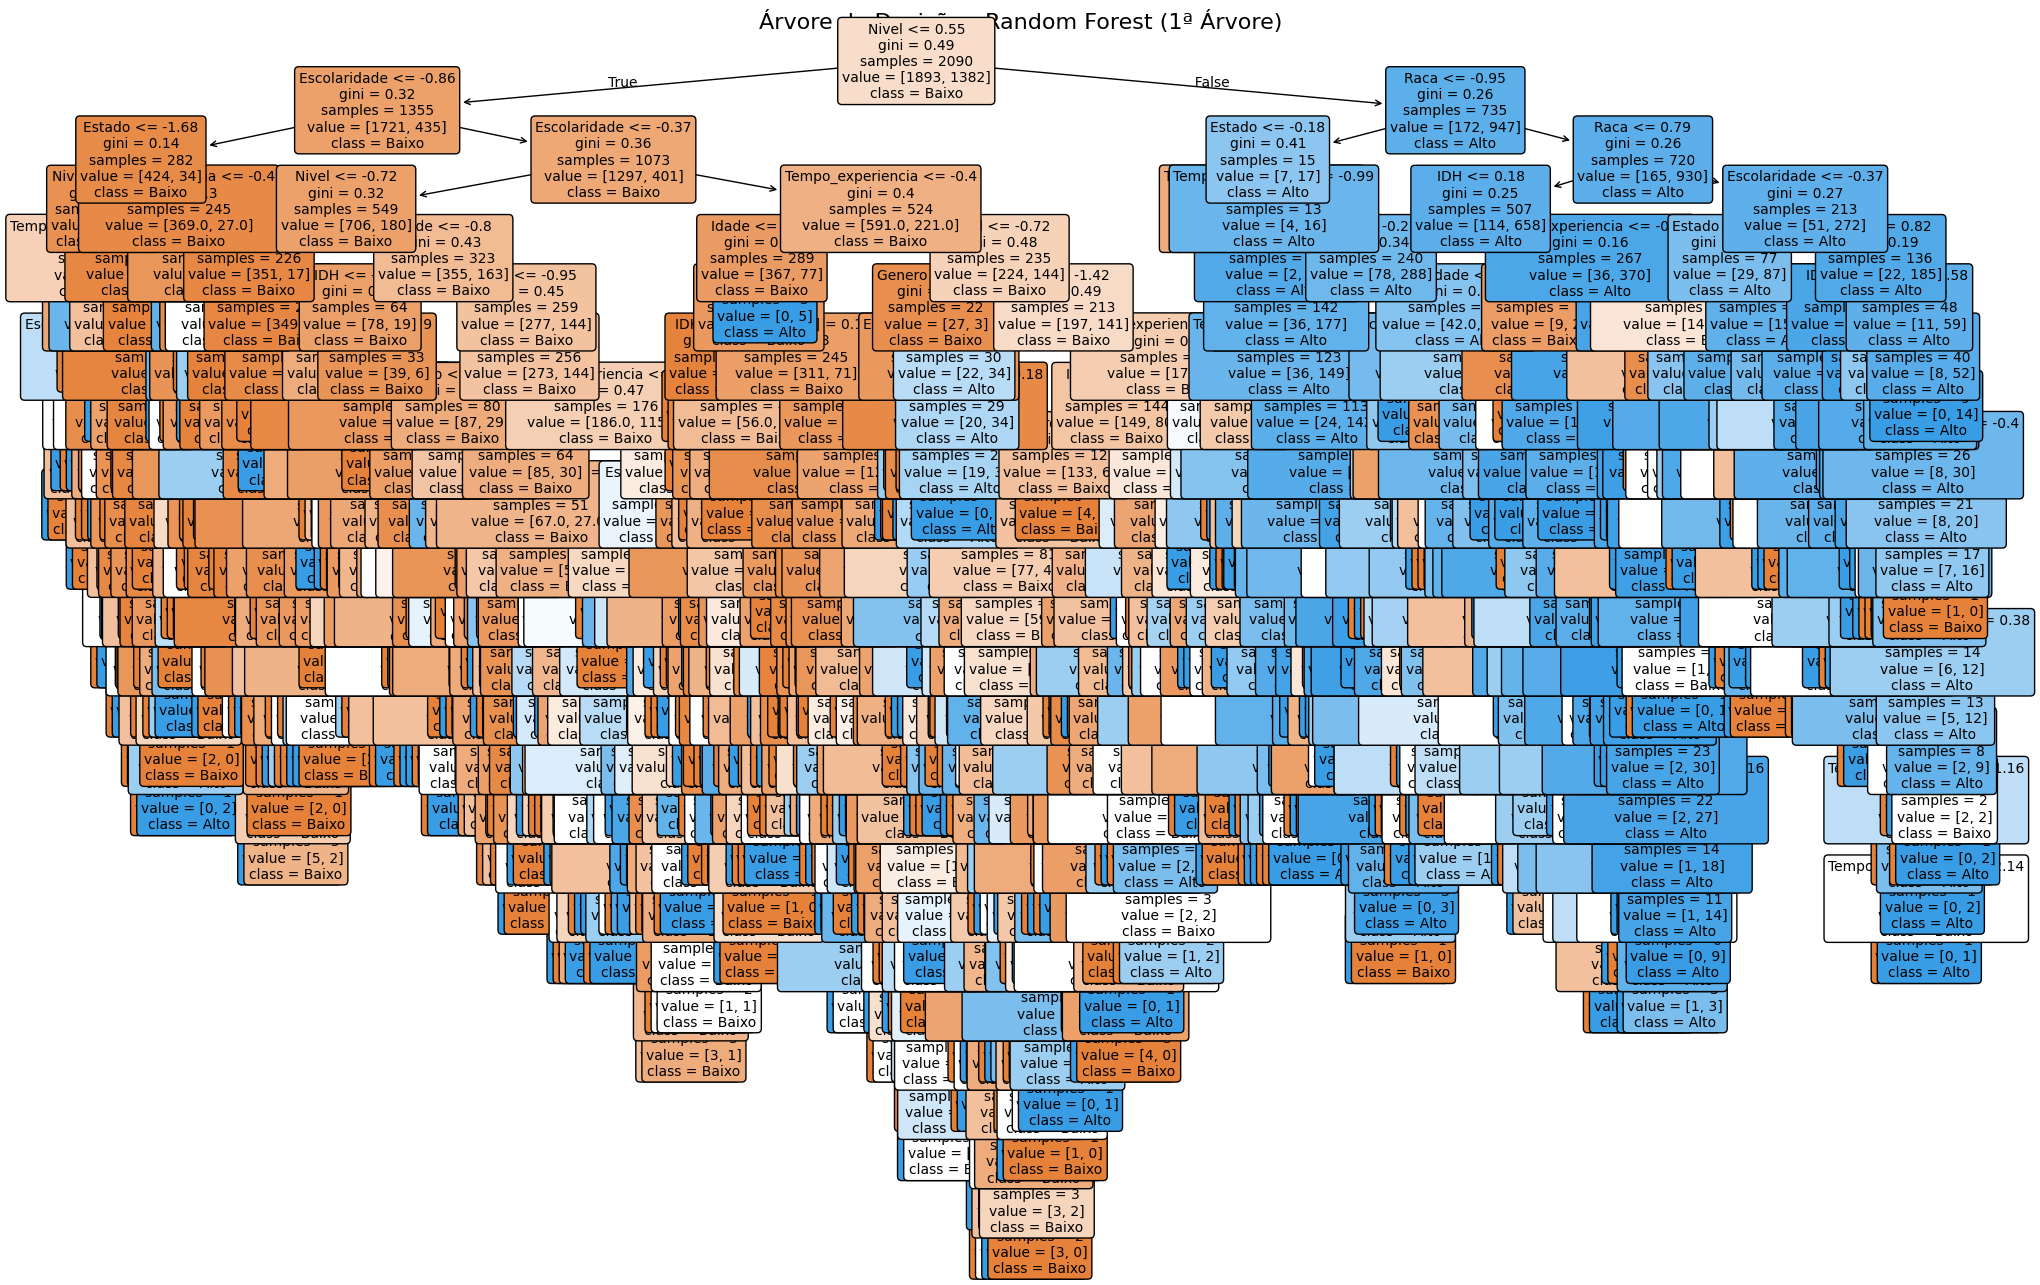

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 12. Visualização de uma das árvores da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()

Acurácia (Treino): 0.9554198473282443
Acurácia (Teste): 0.7527472527472527

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.77      0.82      0.79       208
        Alto       0.73      0.67      0.70       156

    accuracy                           0.75       364
   macro avg       0.75      0.74      0.74       364
weighted avg       0.75      0.75      0.75       364



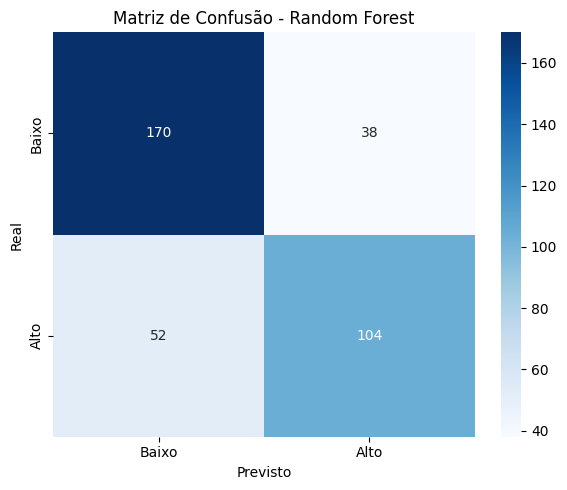

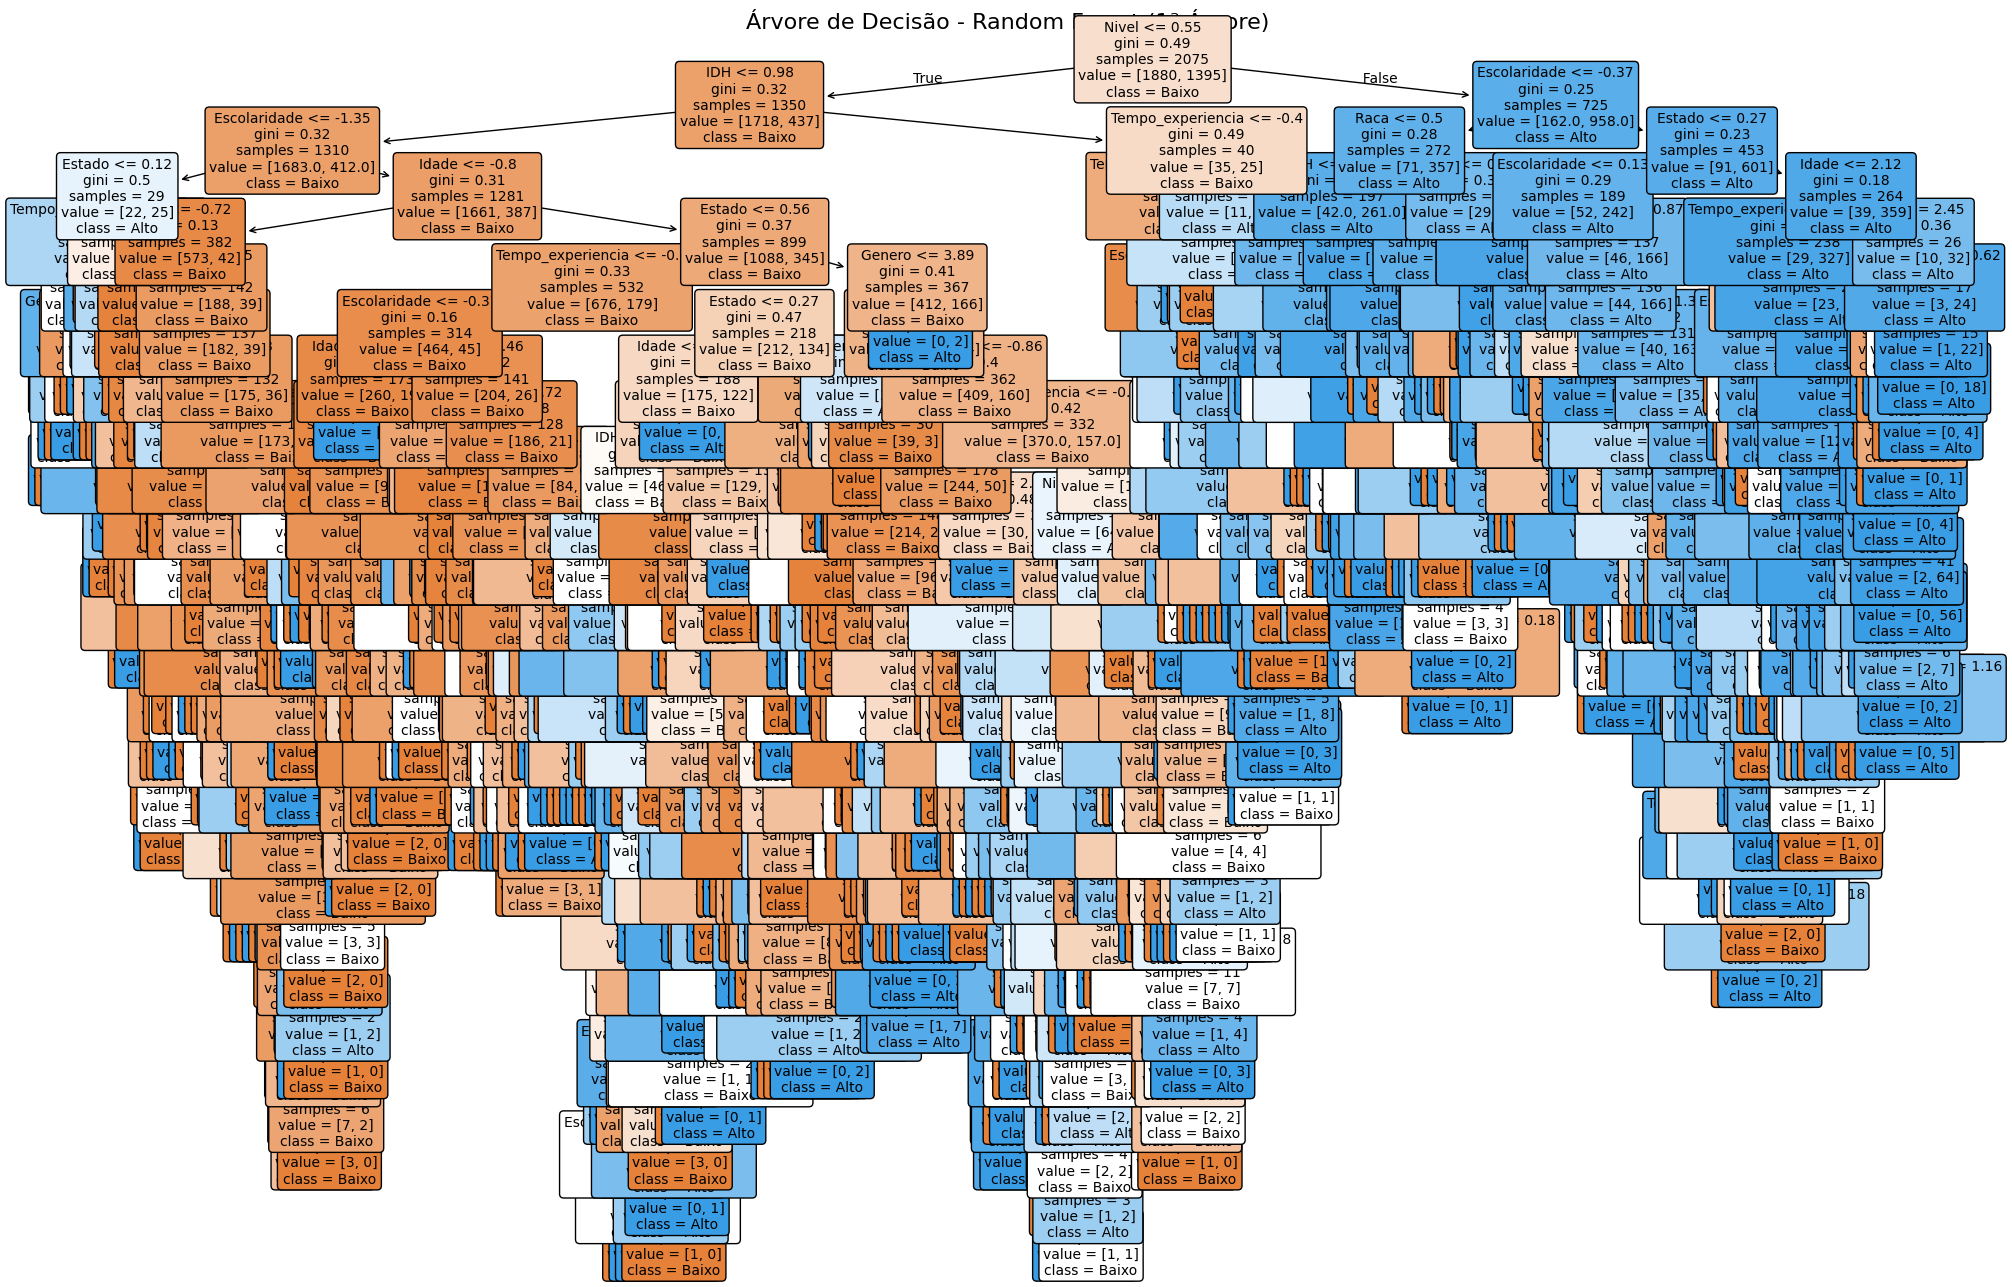

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Codificar variáveis categóricas
le = LabelEncoder()
for col in ['Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel']:
    df[col] = le.fit_transform(df[col])

# 4. Variáveis independentes (X) e alvo (y)
X = df.drop("Salario", axis=1)
y = df["Salario"].map({"Baixo": 0, "Alto": 1})  # transforma em binário

# 5. Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)

# 7. Modelo Random Forest
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

# 8. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 9. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))

# 10. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 11. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 12. Visualização de uma das árvores da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()

Acurácia média (validação cruzada): 0.7898
Acurácia (Treino): 0.9679389312977099
Acurácia (Teste): 0.7857142857142857
ROC-AUC (Teste): 0.8645833333333334

Relatório de Classificação (Conjunto de Teste):

              precision    recall  f1-score   support

       Baixo       0.79      0.86      0.82       208
        Alto       0.78      0.69      0.73       156

    accuracy                           0.79       364
   macro avg       0.79      0.77      0.78       364
weighted avg       0.79      0.79      0.78       364



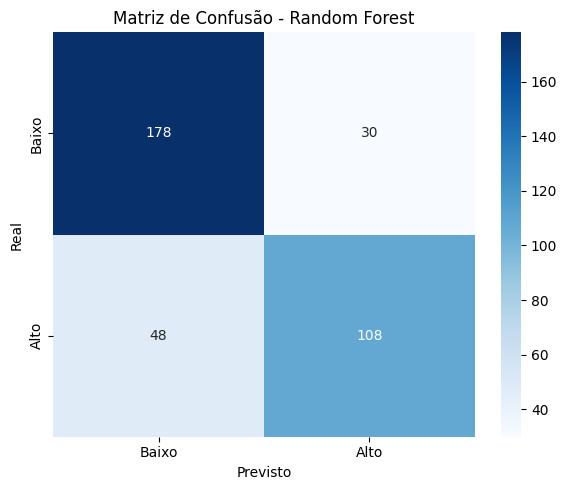

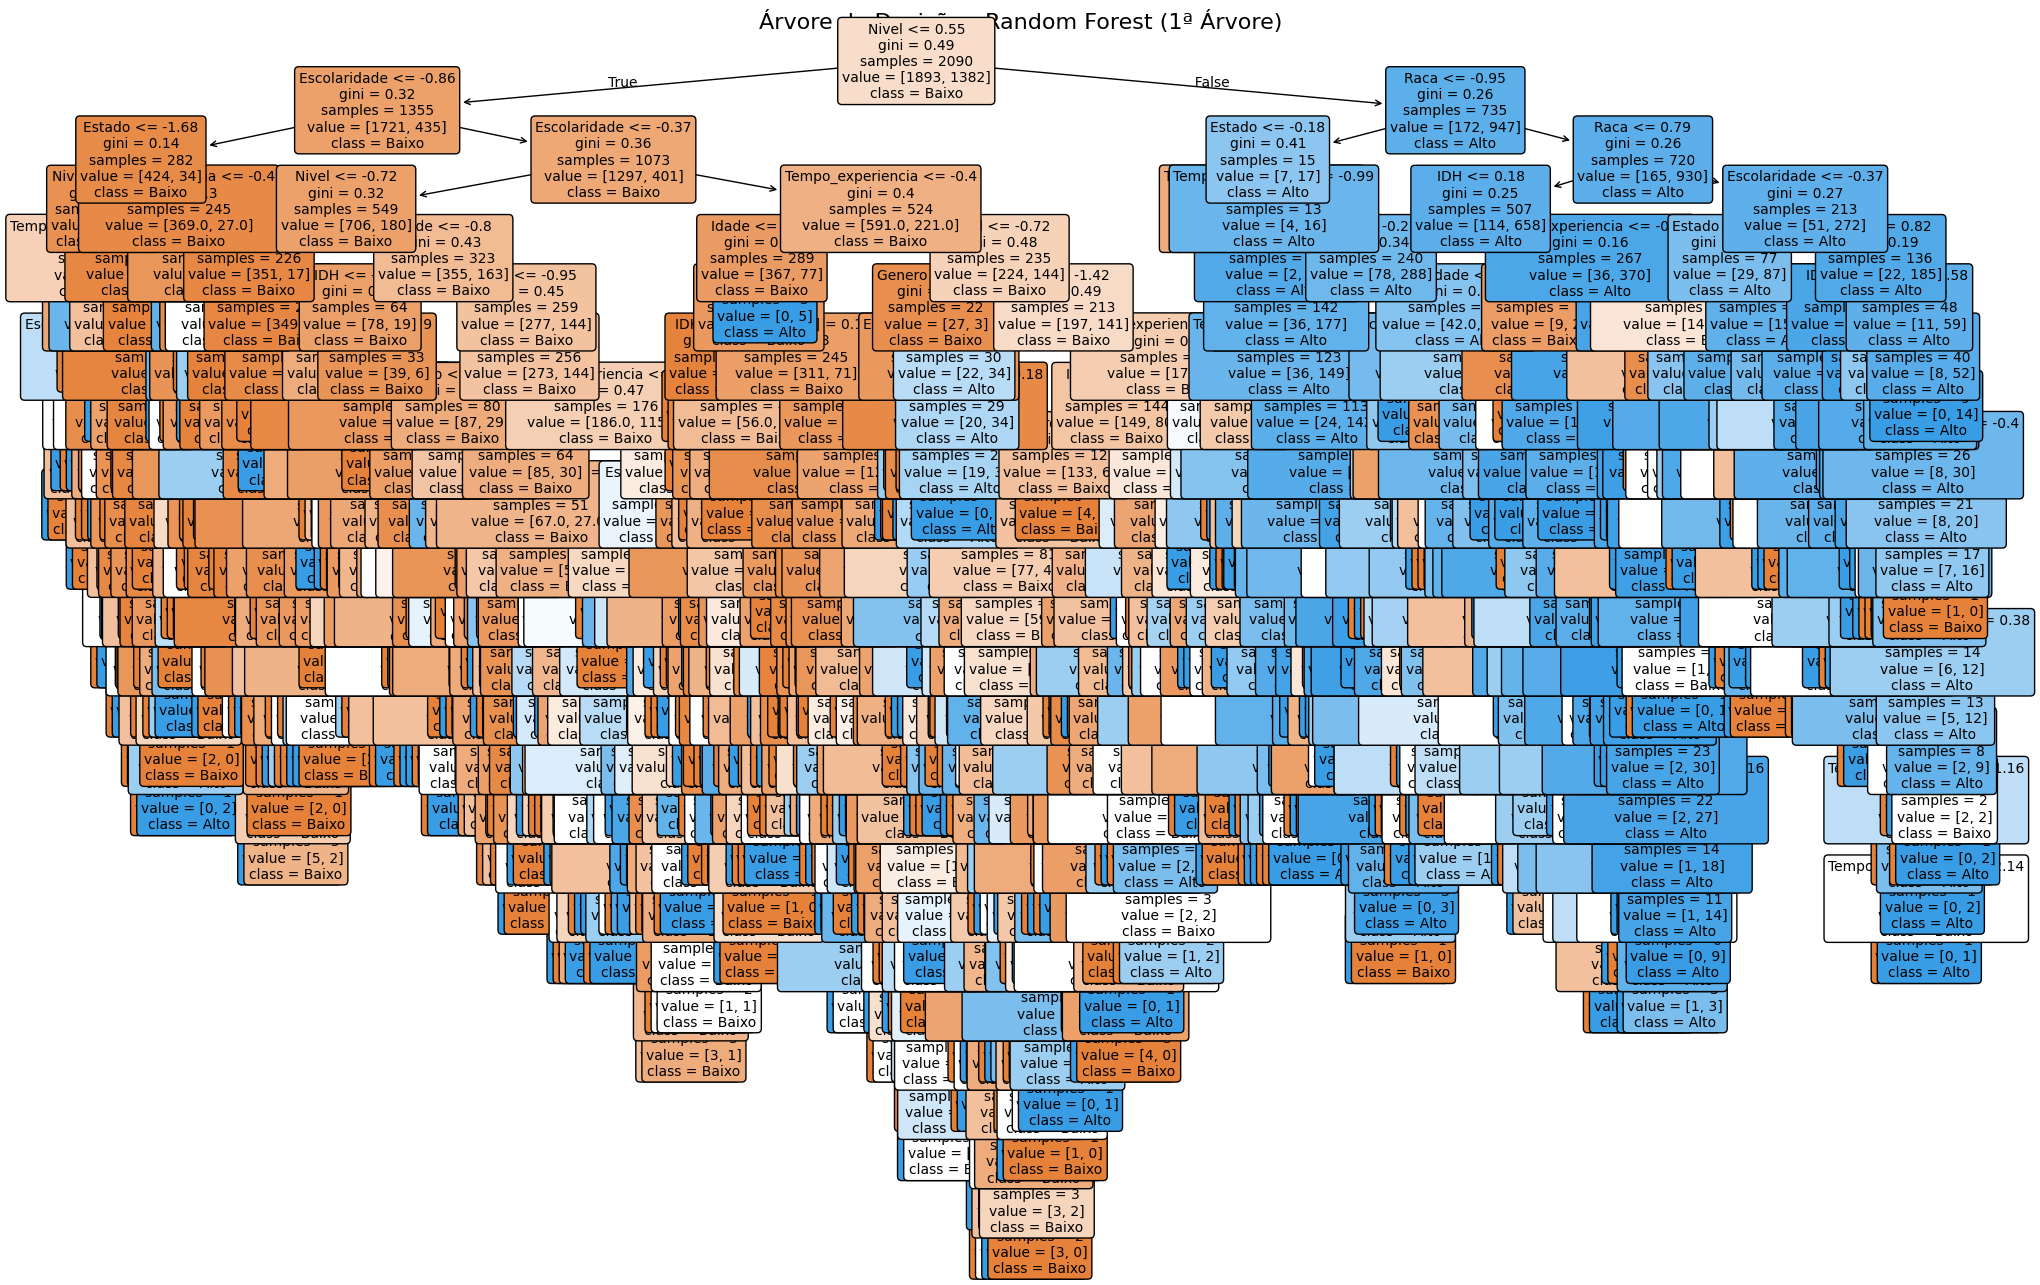

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn import tree
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_excel("Base_random_forest.xlsx")

# 2. Ajustar nomes de colunas
df.columns = ['Idade', 'Genero', 'Raca', 'Estado', 'Escolaridade', 'Nivel', 'Tempo_experiencia', 'IDH', 'Salario']

# 3. Transformar variável alvo 'Salario' em binário
if df['Salario'].dtype == 'object':
    df['Salario'] = df['Salario'].map({"Baixo": 0, "Alto": 1})
y = df['Salario']

# 5. Codificar variáveis categóricas em X
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

# 6. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Validação cruzada (CV=5)
model_cv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model_cv, X_scaled, y, cv=5, scoring='accuracy')
print("Acurácia média (validação cruzada): {:.4f}".format(cv_scores.mean()))

# 8. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=42)

# 9. Treinar modelo final
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Predições
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 11. Avaliação
print("Acurácia (Treino):", accuracy_score(y_train, y_train_pred))
print("Acurácia (Teste):", accuracy_score(y_test, y_test_pred))
print("ROC-AUC (Teste):", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 12. Relatório de Classificação
print("\nRelatório de Classificação (Conjunto de Teste):\n")
print(classification_report(y_test, y_test_pred, target_names=["Baixo", "Alto"]))

# 13. Matriz de Confusão
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Alto"], yticklabels=["Baixo", "Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 14. Visualizar uma árvore da floresta
plt.figure(figsize=(24, 16))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X.columns,
    class_names=["Baixo", "Alto"],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    proportion=False
)
plt.title("Árvore de Decisão - Random Forest (1ª Árvore)", fontsize=16)
plt.show()